

## Importing Libraries and Datasets

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
df = pd.read_csv('new_data_1.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [49]:
# number of rows and columns in the data frame
df.shape

(6362620, 11)

In [50]:
df.drop('isFlaggedFraud',axis =1, inplace = True)

### Checking Missing Values in the dataset

In [51]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

There is no null values in the data set

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [53]:
# to  see the mean, count , minimum and maximum values of the data
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


<AxesSubplot:xlabel='type', ylabel='count'>

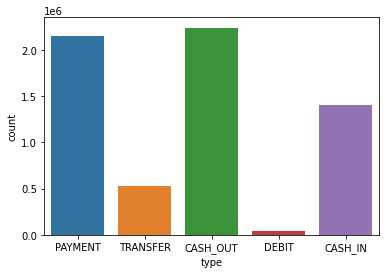

In [9]:
# to count plot of the Payment type column using Seaborn library
sns.countplot(x='type', data=df)


<AxesSubplot:xlabel='type', ylabel='amount'>

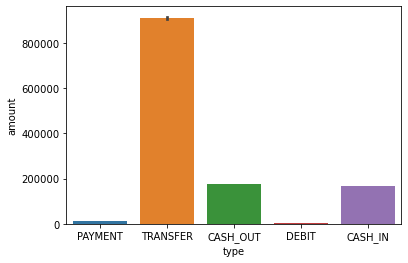

In [12]:
 # Using the bar plot for analyzing Type and amount column simultaneously
sns.barplot(x='type', y='amount', data=df)

C:\Users\NANO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='step', ylabel='Density'>

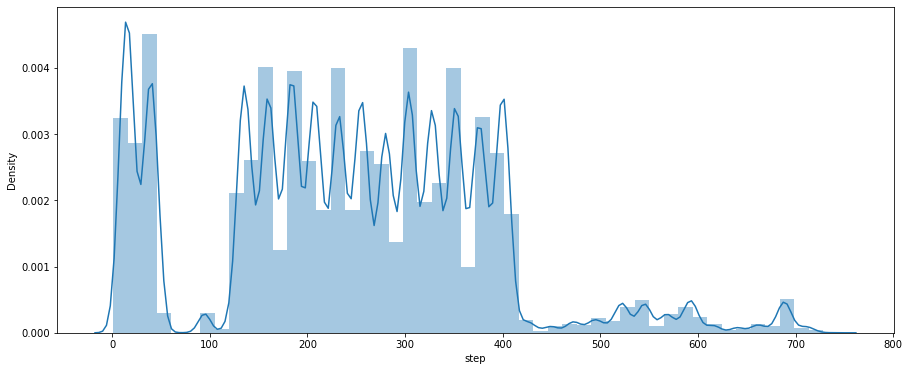

In [13]:
# Now let’s see the distribution of the step column using distplot
plt.figure(figsize=(15, 6))
sns.distplot(df['step'], bins=50)

The graph shows the maximum distribution among 150 to 400 of step

<AxesSubplot:>

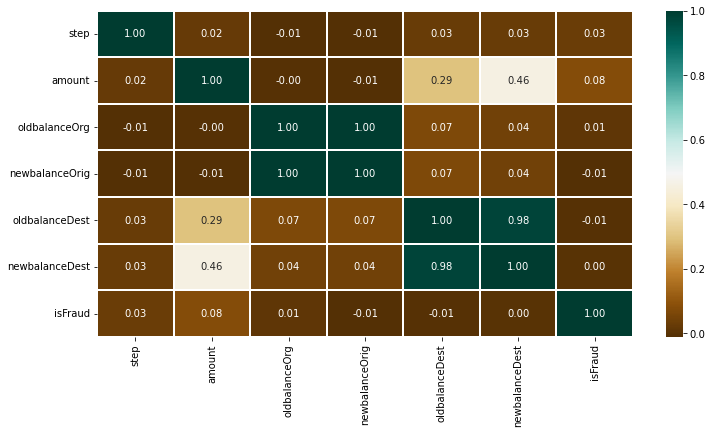

In [14]:
#Let’s find the correlation among different features using Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

In [54]:
# check the distribution of data among both the prediction values
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

Both zeros and ones are improper, so we to do sampling

## Data Preprocessing
This step includes the following : 

* Encoding of Type column
* Dropping irrelevant columns like nameOrig, nameDest
* Data Splitting

In [55]:
new_df = pd.get_dummies(df['type'], drop_first=True)
data = pd.concat([df,new_df], axis=1)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,1,0


In [56]:
X = data.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data['isFraud']

In [57]:
#Let’s check the shape of extracted data
X.shape, y.shape

((6362620, 10), (6362620,))

In [58]:
from imblearn.under_sampling import NearMiss

# Assuming X and y are your features and target variable
nm = NearMiss()
X_resampled, y_resampled = nm.fit_resample(X, y)


In [59]:
y_resampled.value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42)

In [61]:
X_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
1420,355,59.15,0.00,0.0,0.00,0.00,0,0,1,0
10126,169,19244.90,19244.90,0.0,264512.88,283757.78,1,0,0,0
10643,215,332151.67,332151.67,0.0,0.00,332151.67,1,0,0,0
14059,526,210525.95,210525.95,0.0,461327.69,671853.64,1,0,0,0
15160,630,17484.29,17484.29,0.0,0.00,0.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
11284,273,159106.12,159106.12,0.0,0.00,0.00,0,0,0,1
11964,336,170038.31,170038.31,0.0,0.00,0.00,0,0,0,1
5390,323,157.56,0.00,0.0,0.00,0.00,0,0,1,0
860,307,34.64,0.00,0.0,0.00,0.00,0,0,1,0


In [75]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st= StandardScaler()    
x_train= st.fit_transform(X_train)    
x_test= st.transform(X_test)  

## Model Training


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [79]:
# Initialize different classifiers
models = [LogisticRegression(), RandomForestClassifier(), SVC(), KNeighborsClassifier(), GaussianNB()]

for model in models:
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Training Accuracy of {type(model).__name__}: {train_accuracy}")
    print(f"Testing Accuracy of {type(model).__name__}: {test_accuracy}")
    print()

C:\Users\NANO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy of LogisticRegression: 0.9953905026961211
Testing Accuracy of LogisticRegression: 0.9943181818181818

Training Accuracy of RandomForestClassifier: 1.0
Testing Accuracy of RandomForestClassifier: 0.999797077922078

Training Accuracy of SVC: 0.9350321795094799
Testing Accuracy of SVC: 0.9316152597402597

Training Accuracy of KNeighborsClassifier: 0.9880848843277091
Testing Accuracy of KNeighborsClassifier: 0.9786931818181818

Training Accuracy of GaussianNB: 0.9819968690206993
Testing Accuracy of GaussianNB: 0.9768668831168831



**Logistic Regression**: The model is performing consistently well on both the training and testing sets, with very similar high accuracy scores.

**Random Forest Classifier**: The model is achieving perfect accuracy on the training set, suggesting it may be overfitting, but it is also performing exceptionally well on the testing set.

**Support Vector Machine (SVC)**: The model is showing a bit of a performance drop on the testing set compared to the training set, which could indicate that it might benefit from further tuning or a different kernel.

**K-Nearest Neighbors Classifier**: The model is performing well on both the training and testing sets, but it appears to be slightly overfitting as the training accuracy is higher than the testing accuracy.

**Gaussian Naive Bayes**: The model is also performing well on both the training and testing sets, with similar accuracy scores, suggesting it is not overfitting.